<a href="https://colab.research.google.com/github/1dhiman/100days-ml/blob/master/2019/dominant_colors_in_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are the Dominant Colors in an Image?

We will first look at converting an image into its component colors in the form of a matrix, and then perform k-means clustering on it to find the dominant colors.

Below is the process for **JPG** images

An image with a JPG extension is stored in memory as a list of dots, known as pixels. A pixel, or a picture element, represents a single dot in an image. The color of the dot is determined by a combination of three values — its three component colors (Red, Blue and Green). The color of the pixel is essentially a combination of these three component colors.


The `imread()` method of the image class decodes an image into its RGB values. The output is an array with the dimensions M x N x 3, where M and N are the dimensions of the image.

In [66]:
from matplotlib import image as img
image = img.imread('tomato.jpg')
image.shape

(282, 425, 3)

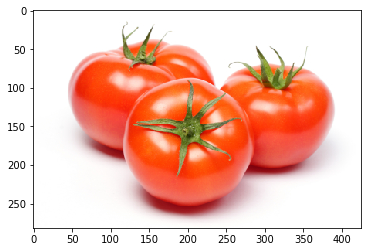

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(image)
plt.show()

In the process of finding out the dominant colors of an image, we are not concerned about the position of the pixel. Hence, we need to convert the M x N x 3 matrix to three individual lists, which contain the respective red, blue and green values.

In [0]:
r = []
g = []
b = []
for line in image:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

We can visualize these variables on three dimensions to understand how many dominant colors may exist.

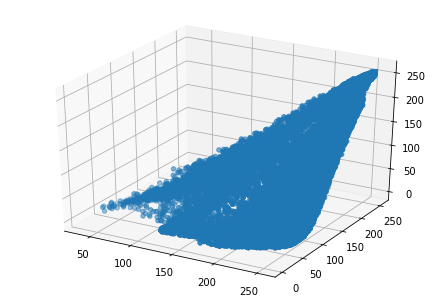

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

There are essentially three steps involved in the process of k-means clustering with SciPy:

1. Standardize the variables by dividing each data point by its standard deviation. We will use the `whiten()` method of the vq class.
2. Generate cluster centers using the `kmeans()` method.
3. Generate cluster labels for each data point using the `vq()` method of the vqclass.

In [68]:
import pandas as pd

df = pd.DataFrame(
    {'red': r,
     'blue': b,
     'green': g
    })

from scipy.cluster.vq import whiten

df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
97246,255,255,255,8.638749,2.601593,3.250595
44494,254,85,125,8.604872,0.867198,1.593429
87029,142,28,21,4.810598,0.285665,0.267696
117226,255,255,255,8.638749,2.601593,3.250595
51155,253,58,119,8.570994,0.591735,1.516944
44848,253,4,80,8.570994,0.040809,1.019794
11335,255,255,255,8.638749,2.601593,3.250595
51539,253,7,45,8.570994,0.071416,0.573634
60941,169,119,179,5.725289,1.214077,2.281790
77920,254,4,88,8.604872,0.040809,1.121774


In [73]:
from scipy.cluster.vq import kmeans

cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)
print(cluster_centers)

[[7.73193954 1.25102103 0.60533313]
 [8.55100269 3.15022167 2.51295767]]


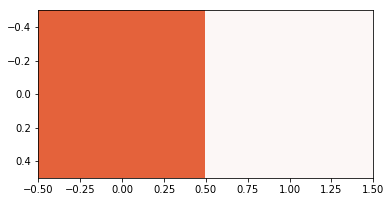

In [74]:
colors = []

r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
      scaled_r * r_std / 255,
      scaled_g * g_std / 255,
      scaled_b * b_std / 255
  ))
  
plt.imshow([colors])
plt.show()

As expected, the colors seen in the image are quite similar to the prominent colors in the image that we started with. 